# Documents DB File

In [ ]:
import os
import sys

currentdir = os.getcwd()
parentdir = os.path.dirname(currentdir)
sys.path.append(parentdir)

from techminer import *

directory = "../data/processed/debug"
file_name = "../data/raw/fintech-scopus.csv"
import_scopus_file(file_name, directory)

# !cat ../data/processed/debug/filter.yaml

# Thesaurus

In [ ]:
import os
import sys

currentdir = os.getcwd()
parentdir = os.path.dirname(currentdir)
sys.path.append(parentdir)

from techminer import *

directory = "../data/processed/debug"

# clean_institutions(directory)
# clean_keywords(directory)
# apply_thesaurus(directory, thesaurus_file="keywords.txt", input_column="author_keywords", output_column="author_keywords_thesaurus", strict=False)
# create_thesaurus(directory, column="keywords", thesaurus_file="test_thesaurus.txt", sep="; ")

# Basic analysis

In [ ]:
import os
import sys

currentdir = os.getcwd()
parentdir = os.path.dirname(currentdir)
sys.path.append(parentdir)

from techminer import *

directory = "../data/processed/debug"

# core_authors(directory)
# core_sources(directory)
# coverage(directory)
# impact_analysis(directory, column="authors")
# summary(directory)
# terms_analysis(directory, column='authors')
# terms_per_year_analysis(directory, column='countries', metric='num_documents')
# time_analysis(directory)
# top_documents(directory)

# Basic plots

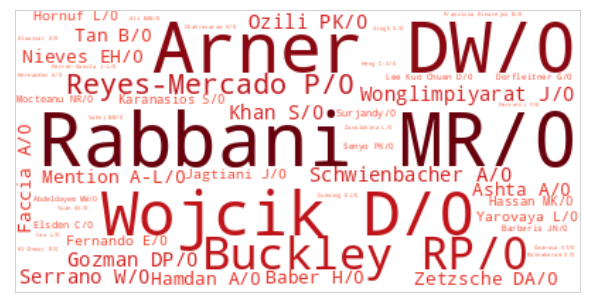

In [2]:
import os
import sys

currentdir = os.getcwd()
parentdir = os.path.dirname(currentdir)
sys.path.append(parentdir)

from techminer import *

directory = "../data/processed/debug"

# bar_chart(series=time_analysis(directory)['num_documents'], darkness=time_analysis(directory)['global_citations'])
# pie_chart(series=time_analysis(directory)['num_documents'], darkness=time_analysis(directory)['global_citations'])
# column_chart(series=time_analysis(directory)['num_documents'], darkness=time_analysis(directory)['global_citations'])
# word_cloud(terms_analysis(directory, column='authors')['num_documents'].head(50), cmap='Reds')
# tree_map(terms_analysis(directory, column='authors')['num_documents'].head(50), cmap='Reds')

# bradford_plot(directory)
# lotka_plot(directory)
# worldmap(directory, metric="num_documents")

# Advanced analysis

In [ ]:
# BigraphAnalyzer(dirpath_or_records="../data/processed/debug", column='countries', by='countries').table_

In [ ]:
import pandas as pd

pd.read_csv("../data/processed/debug/documents.csv").iso_source_name.value_counts()

In [ ]:
pd.read_csv("../data/processed/debug/documents.csv").columns